In [1]:
# importing package
import matplotlib.pyplot as plt
import librosa
import torch
import torchaudio
import util
import librosa
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
def plot_spectrogram(specgram, if_english, title=None, ylabel="freq bin", cmap="viridis"):
    #matplotlib.rcParams['font.family'] = 'Times New Roman'
    if(if_english):
        fig, axs = plt.subplots(1, 1)
        axs.set_title(title or "Spectrogram (dB)", fontsize=13, fontweight='bold')
        axs.set_ylabel('Frequency Bin', fontsize=13)
        axs.set_xlabel("Frame", fontsize=13)
        im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", cmap=cmap)
        fig.colorbar(im, ax=axs)
        plt.show(block=False)
    else:
        fig, axs = plt.subplots(1, 1)
        axs.set_title(title or "Espectrograma (dB)", fontsize=13, fontweight='bold')
        axs.set_ylabel('Segmento de Frecuencia', fontsize=13)
        axs.set_xlabel("Ventana", fontsize=13)
        im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", cmap=cmap)
        fig.colorbar(im, ax=axs)
        plt.show(block=False)

In [6]:
x_clean, y_clean = librosa.load('data/LibriSpeech/train-clean-100/1723/141149/1723-141149-0015.flac')
Sxx_clean, _, _ = util.make_spectrum(y=x_clean)

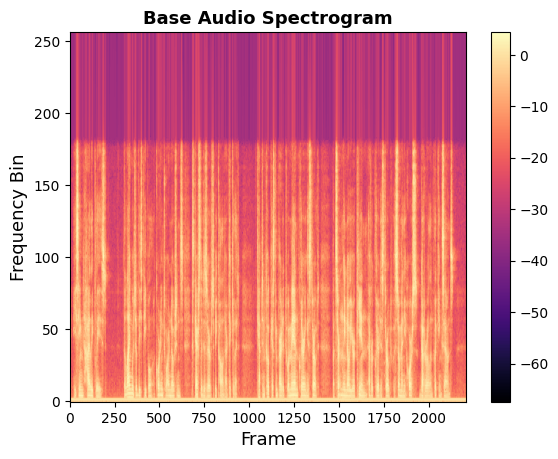

In [15]:
plot_spectrogram(Sxx_clean, True, title='Base Audio Spectrogram', cmap='magma')

In [9]:
x_noise, y_noise = librosa.load('audio_with_noise/-3/nonstationary_helicopter/1723-141149-0015.flac')
Sxx_noise, _, _ = util.make_spectrum(y=x_noise)

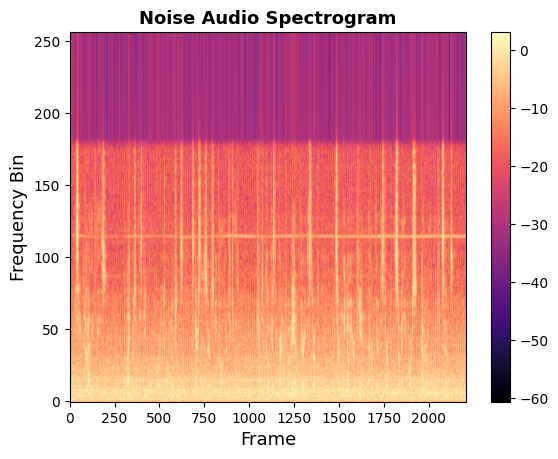

In [10]:
plot_spectrogram(Sxx_noise, True, title='Noise Audio Spectrogram', cmap='magma')

In [11]:
x_denoise, y_denoise = librosa.load('audios_denoised_dnn/-3/nonstationary_helicopter/1723-141149-0015.flac')
Sxx_denoise, _, _ = util.make_spectrum(y=x_denoise)

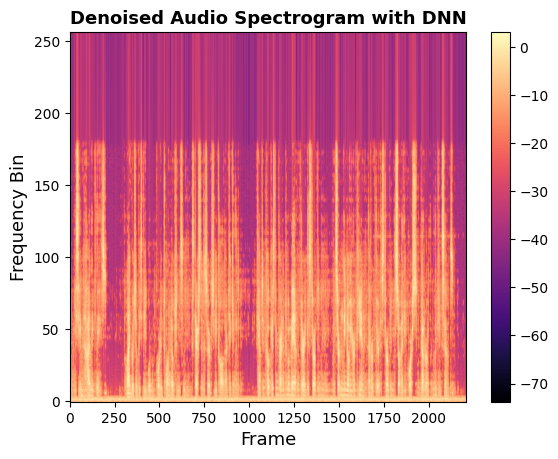

In [12]:
plot_spectrogram(Sxx_denoise, True, title='Denoised Audio Spectrogram with DNN', cmap='magma')

In [13]:
x_denoise_wt, y_denoise_wt = librosa.load('audios_denoised_wt/-3/nonstationary_helicopter/1723-141149-0015.flac')
Sxx_denoise_wt, _, _ = util.make_spectrum(y=x_denoise_wt)

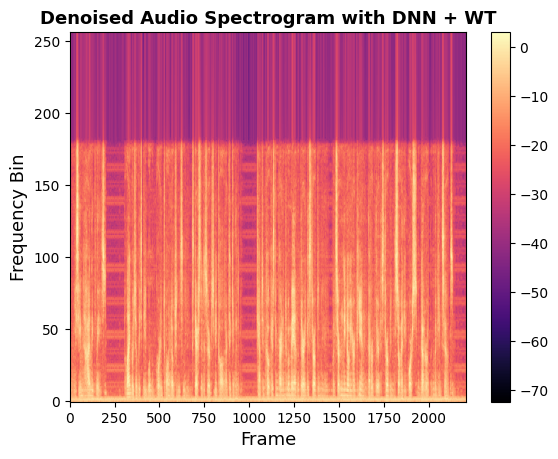

In [14]:
plot_spectrogram(Sxx_denoise_wt, True, title='Denoised Audio Spectrogram with DNN + WT', cmap='magma')

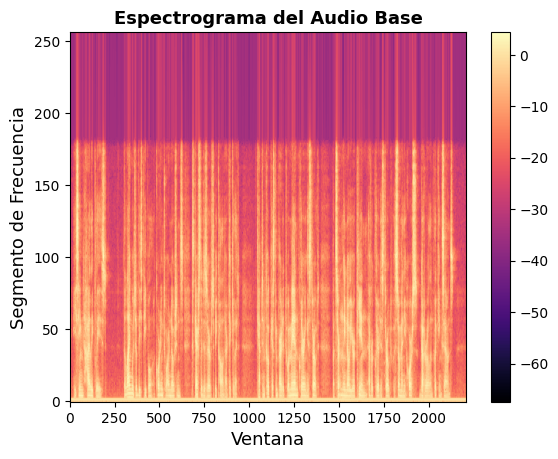

In [16]:
plot_spectrogram(Sxx_clean, False, title='Espectrograma del Audio Base', cmap='magma')

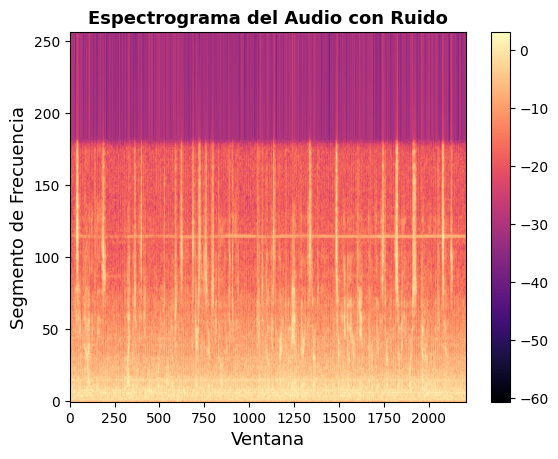

In [17]:
plot_spectrogram(Sxx_noise, False, title='Espectrograma del Audio con Ruido', cmap='magma')

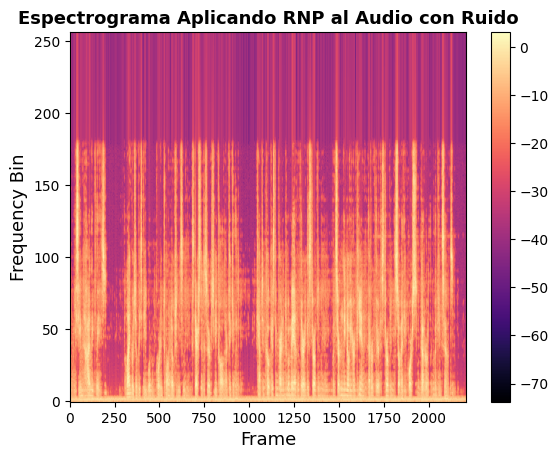

In [18]:
plot_spectrogram(Sxx_denoise, True, title='Espectrograma Aplicando RNP al Audio con Ruido', cmap='magma')

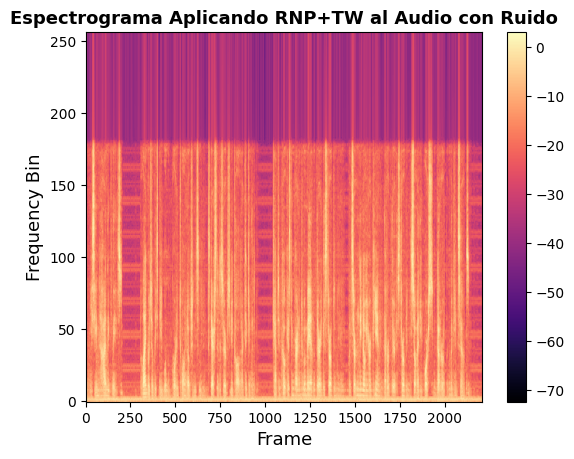

In [20]:
plot_spectrogram(Sxx_denoise_wt, True, title='Espectrograma Aplicando RNP+TW al Audio con Ruido', cmap='magma')

In [21]:
x1, y1 = librosa.load('data/LibriSpeech/train-clean-100/1723/141149/1723-141149-0015.flac')
x2, y2 = librosa.load('audio_with_noise/-3/nonstationary_helicopter/1723-141149-0015.flac')
x3, y3 = librosa.load('audios_denoised_dnn/-3/nonstationary_helicopter/1723-141149-0015.flac')
x4, y4 = librosa.load('audios_denoised_wt/-3/nonstationary_helicopter/1723-141149-0015.flac')

In [22]:
pesq1, stoi1, _, _, _ = util.eval_audio(x1, x2)
print(pesq1, stoi1)
pesq1, stoi1, _, _, _ = util.eval_audio(x1, x3)
print(pesq1, stoi1)
pesq1, stoi1, _, _, _ = util.eval_audio(x1, x4)
print(pesq1, stoi1)

1.4287550449371338 0.5609788298606873
1.8693852424621582 0.6968813538551331
1.9918782711029053 0.6925732493400574


In [63]:
def plot_waveform(waveform, sr, if_english, color, title="Waveform"):
    plt.style.use('seaborn')
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr
    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1, color=color)
    axes.grid(True)
    figure.suptitle(title, fontsize=15, fontweight='bold')
    if if_english:
        plt.xlabel('Time (s)', fontsize=13)
        plt.ylabel('Amplitude', fontsize=13)
    else:
        plt.xlabel('Tiempo (s)', fontsize=13)
        plt.ylabel('Amplitud', fontsize=13)
    plt.tight_layout()  # Añade esta línea para ajustar automáticamente la disposición del gráfico
    plt.show(block=False)


In [64]:
x1, y1 = librosa.load('data/LibriSpeech/train-clean-100/1723/141149/1723-141149-0015.flac')
x2, y2 = librosa.load('audio_with_noise/-3/nonstationary_helicopter/1723-141149-0015.flac')
x3, y3 = librosa.load('audios_denoised_dnn/-3/nonstationary_helicopter/1723-141149-0015.flac')
x4, y4 = librosa.load('audios_denoised_wt/-3/nonstationary_helicopter/1723-141149-0015.flac')

In [65]:
x_clean, y_clean = torchaudio.load('data/LibriSpeech/train-clean-100/1723/141149/1723-141149-0015.flac')

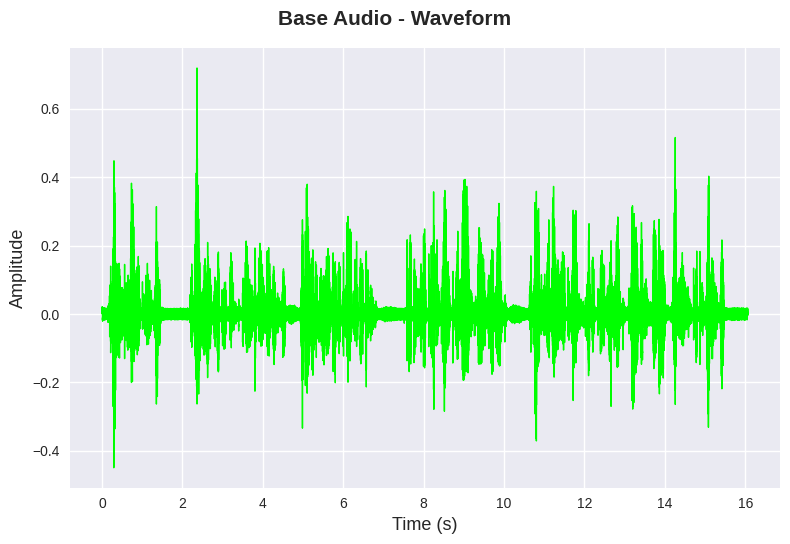

In [66]:
plot_waveform(x_clean, y_clean, True, 'lime', title='Base Audio - Waveform')

In [67]:
x_noise, y_noise = torchaudio.load('audio_with_noise/-3/nonstationary_helicopter/1723-141149-0015.flac')

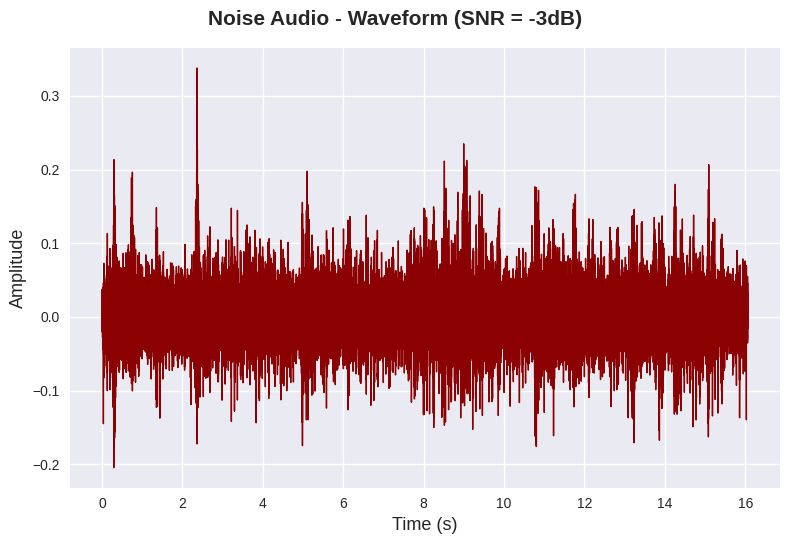

In [68]:
plot_waveform(x_noise, y_noise, True, 'darkred', title='Noise Audio - Waveform (SNR = -3dB)')

In [69]:
x_denoised, y_denoised = torchaudio.load('audios_denoised_dnn/-3/nonstationary_helicopter/1723-141149-0015.flac')

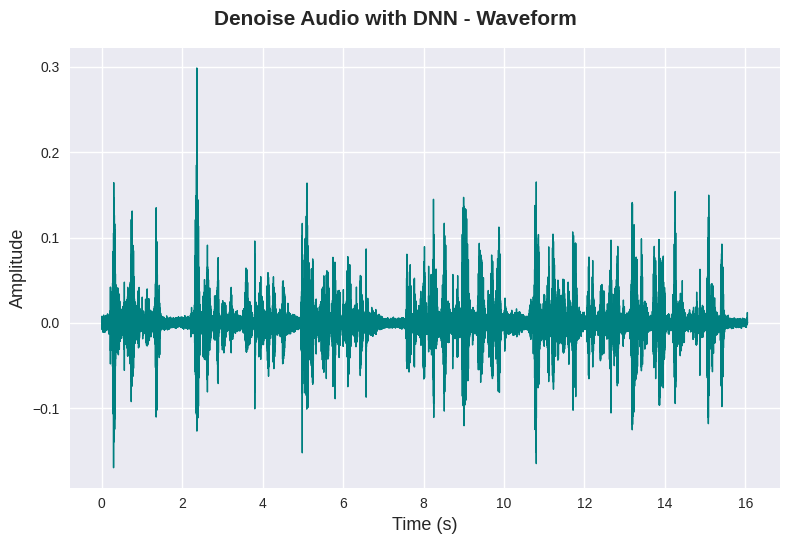

In [70]:
plot_waveform(x_denoised, y_denoised, True, 'teal', title='Denoise Audio with DNN - Waveform')

In [71]:
x_denoised_wt, y_denoised_wt = torchaudio.load('audios_denoised_wt/-3/nonstationary_helicopter/1723-141149-0015.flac')

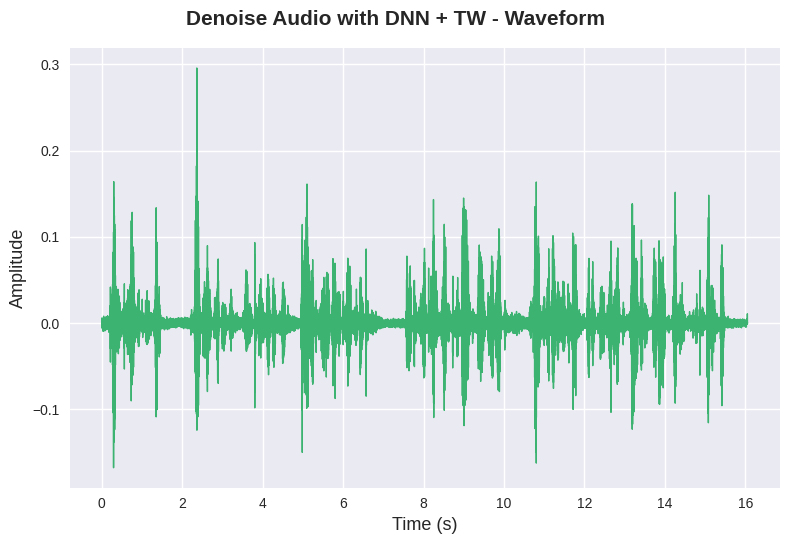

In [72]:
plot_waveform(x_denoised_wt, y_denoised_wt, True, 'mediumseagreen', title='Denoise Audio with DNN + TW - Waveform')

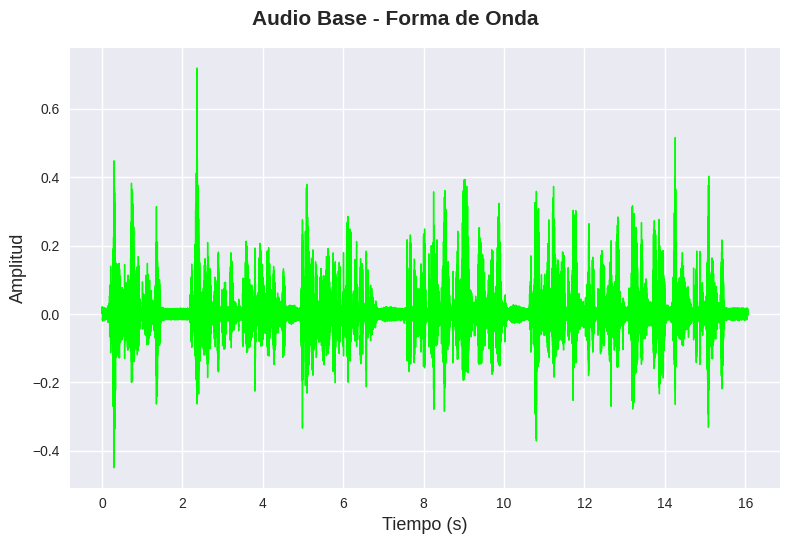

In [73]:
plot_waveform(x_clean, y_clean, False, 'lime', title='Audio Base - Forma de Onda')

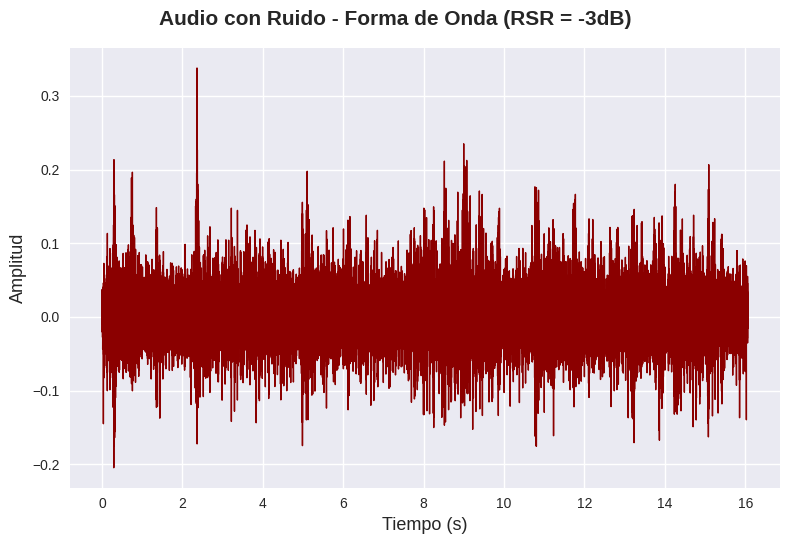

In [74]:
plot_waveform(x_noise, y_noise, False, 'darkred', title='Audio con Ruido - Forma de Onda (RSR = -3dB)')

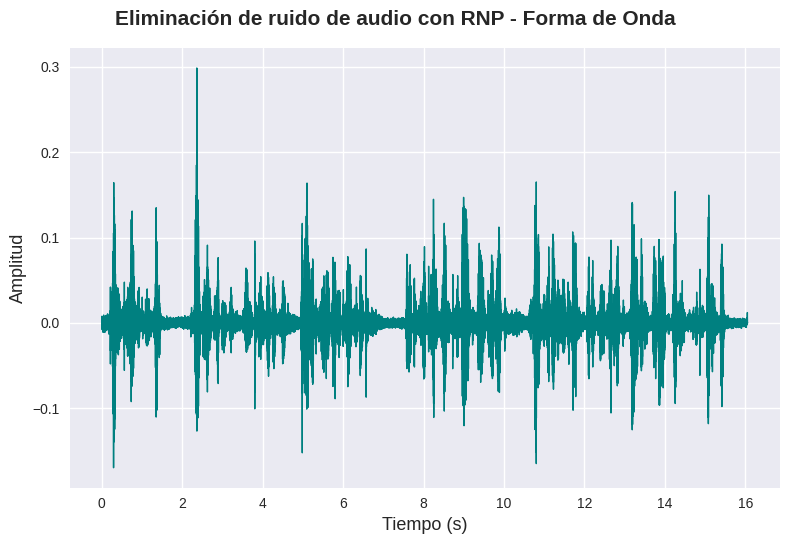

In [75]:
plot_waveform(x_denoised, y_denoised, False, 'teal', title='Eliminación de ruido de audio con RNP - Forma de Onda')

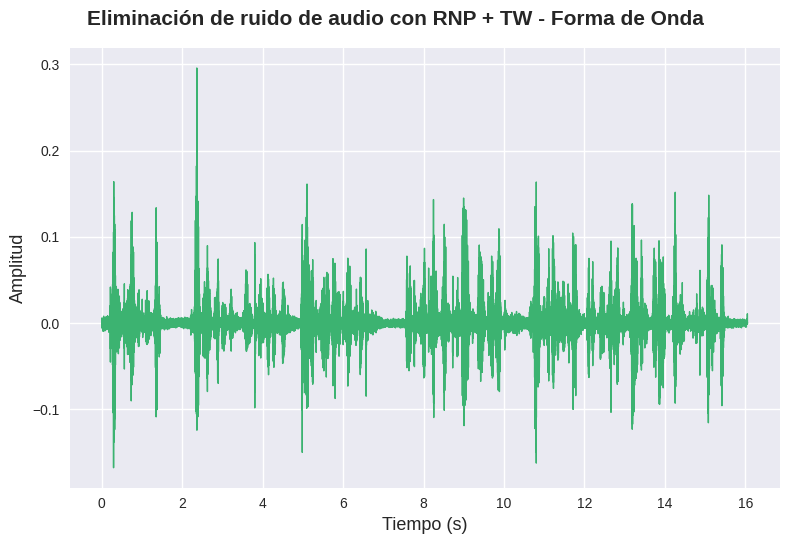

In [76]:
plot_waveform(x_denoised_wt, y_denoised_wt, False, 'mediumseagreen', title='Eliminación de ruido de audio con RNP + TW - Forma de Onda')